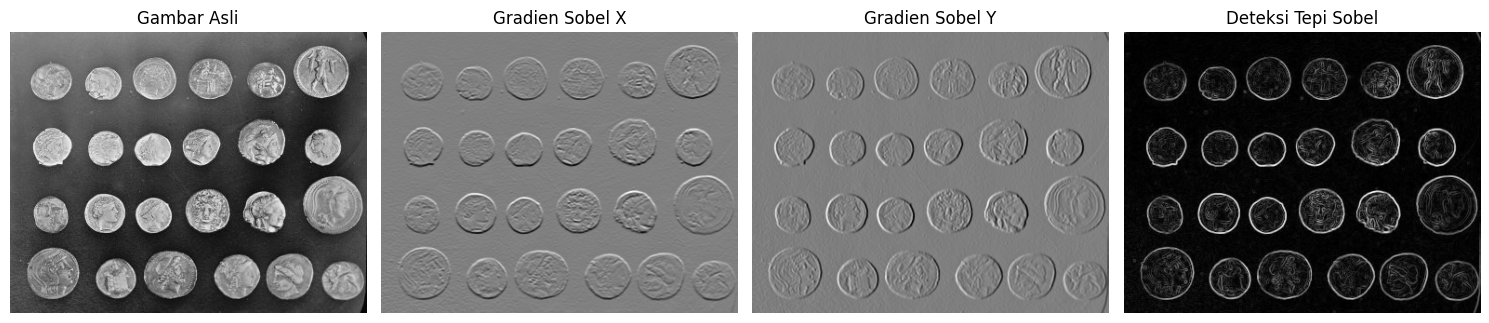

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage
image = data.coins()  # Menggunakan gambar koin bawaan dari skimage

# Konversi ke grayscale jika gambar berwarna (3 channel)
if image.ndim == 3:
    gray_image = color.rgb2gray(image)
else:
    gray_image = image

# Hitung gradien menggunakan Operator Sobel
sobel_x = filters.sobel_h(gray_image)  # Sobel di arah horizontal
sobel_y = filters.sobel_v(gray_image)  # Sobel di arah vertikal
sobel_edge = filters.sobel(gray_image)  # Kombinasi keduanya

# Visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title("Gradien Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title("Gradien Sobel Y")
ax[2].axis("off")

ax[3].imshow(sobel_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Sobel")
ax[3].axis("off")

plt.tight_layout()
plt.show()

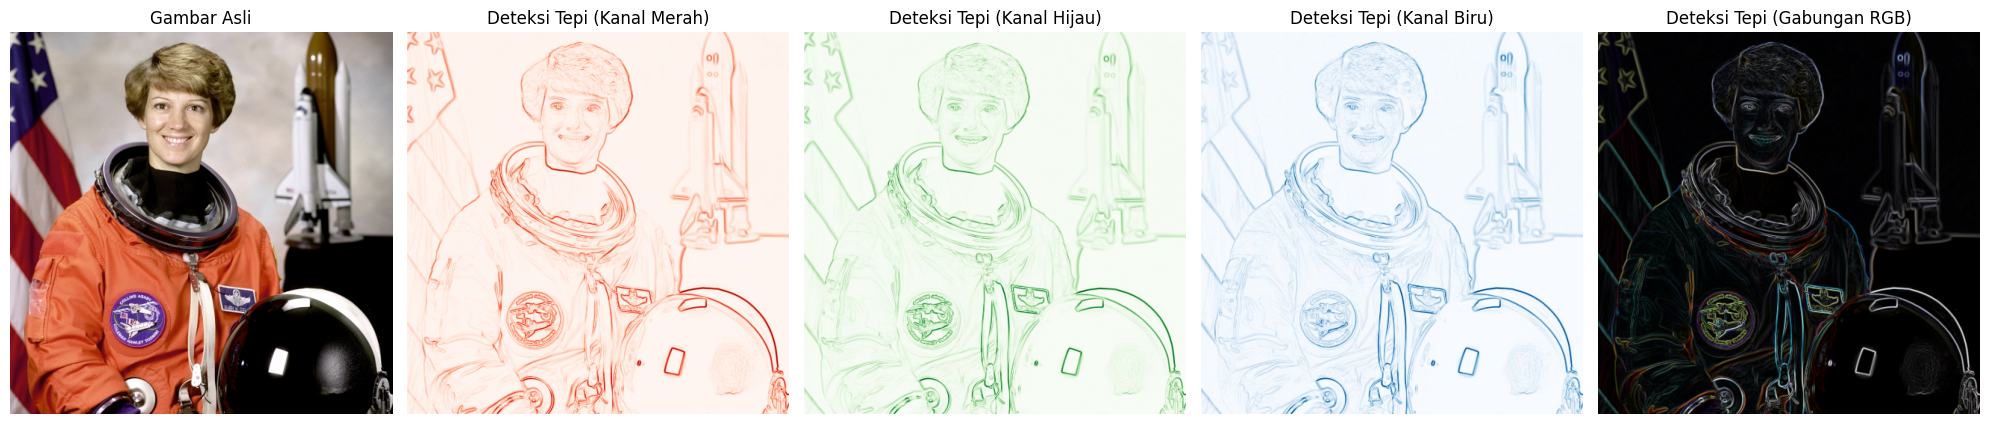

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters

# Ambil gambar bawaan dari skimage (gambar astronaut berwarna)
image = data.astronaut()  # Gambar berwarna bawaan dari skimage

# Pisahkan kanal warna
red_channel = image[:, :, 0]  # Kanal merah
green_channel = image[:, :, 1]  # Kanal hijau
blue_channel = image[:, :, 2]  # Kanal biru

# Terapkan Operator Sobel pada masing-masing kanal warna
sobel_red = filters.sobel(red_channel)
sobel_green = filters.sobel(green_channel)
sobel_blue = filters.sobel(blue_channel)

# Gabungkan hasil dengan menggabungkan ketiga kanal
sobel_color = np.stack((sobel_red, sobel_green, sobel_blue), axis=2)

# Normalisasi hasil Sobel untuk visualisasi yang lebih baik
sobel_color_normalized = sobel_color / np.max(sobel_color)

# Visualisasi hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_red, cmap='Reds')
ax[1].set_title("Deteksi Tepi (Kanal Merah)")
ax[1].axis("off")

ax[2].imshow(sobel_green, cmap='Greens')
ax[2].set_title("Deteksi Tepi (Kanal Hijau)")
ax[2].axis("off")

ax[3].imshow(sobel_blue, cmap='Blues')
ax[3].set_title("Deteksi Tepi (Kanal Biru)")
ax[3].axis("off")

ax[4].imshow(sobel_color_normalized)
ax[4].set_title("Deteksi Tepi (Gabungan RGB)")
ax[4].axis("off")

plt.tight_layout()
plt.show()

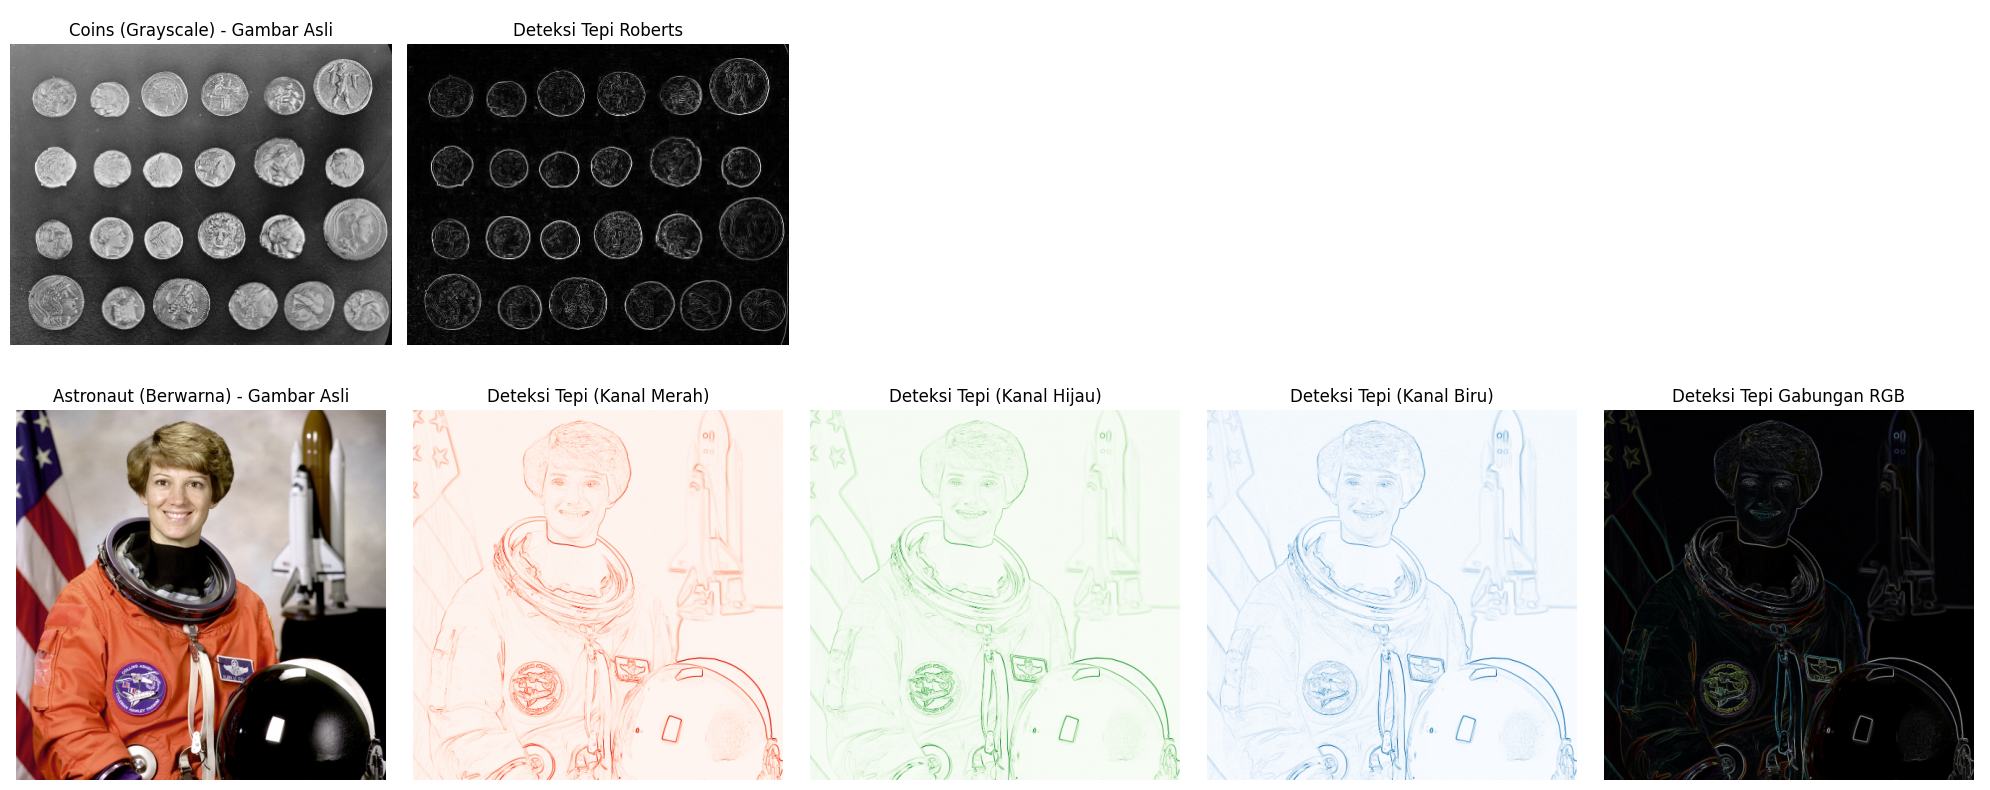

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color

# Ambil gambar bawaan dari skimage
gambar_coins = data.coins()  # Gambar grayscale
gambar_astronaut = data.astronaut()  # Gambar berwarna (RGB)

# List gambar dan nama
gambar_list = [gambar_coins, gambar_astronaut]
nama_list = ["Coins (Grayscale)", "Astronaut (Berwarna)"]

# Buat subplot untuk visualisasi
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, (img, nama) in enumerate(zip(gambar_list, nama_list)):
    if len(img.shape) == 2:  # Jika gambar grayscale
        # Gambar asli (grayscale)
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title(f"{nama} - Gambar Asli")
        axes[i, 0].axis('off')

        # Deteksi tepi menggunakan operator Roberts
        roberts_edge = filters.roberts(img)
        axes[i, 1].imshow(roberts_edge, cmap='gray')
        axes[i, 1].set_title("Deteksi Tepi Roberts")
        axes[i, 1].axis('off')

        # Kosongkan subplot yang tidak digunakan
        for j in range(2, 5):
            axes[i, j].axis('off')
    else:  # Jika gambar berwarna (RGB)
        # Gambar asli (berwarna)
        axes[i, 0].imshow(img)
        axes[i, 0].set_title(f"{nama} - Gambar Asli")
        axes[i, 0].axis('off')

        # Pisahkan kanal warna
        red_channel = img[:, :, 0]
        green_channel = img[:, :, 1]
        blue_channel = img[:, :, 2]

        # Deteksi tepi pada setiap kanal warna
        roberts_red = filters.roberts(red_channel)
        roberts_green = filters.roberts(green_channel)
        roberts_blue = filters.roberts(blue_channel)

        # Gabungkan hasil deteksi tepi dari ketiga kanal
        roberts_color = np.stack((roberts_red, roberts_green, roberts_blue), axis=2)

        # Tampilkan deteksi tepi pada setiap kanal
        axes[i, 1].imshow(roberts_red, cmap='Reds')
        axes[i, 1].set_title("Deteksi Tepi (Kanal Merah)")
        axes[i, 1].axis('off')

        axes[i, 2].imshow(roberts_green, cmap='Greens')
        axes[i, 2].set_title("Deteksi Tepi (Kanal Hijau)")
        axes[i, 2].axis('off')

        axes[i, 3].imshow(roberts_blue, cmap='Blues')
        axes[i, 3].set_title("Deteksi Tepi (Kanal Biru)")
        axes[i, 3].axis('off')

        # Tampilkan gabungan deteksi tepi RGB
        axes[i, 4].imshow(roberts_color)
        axes[i, 4].set_title("Deteksi Tepi Gabungan RGB")
        axes[i, 4].axis('off')

plt.tight_layout()
plt.show()

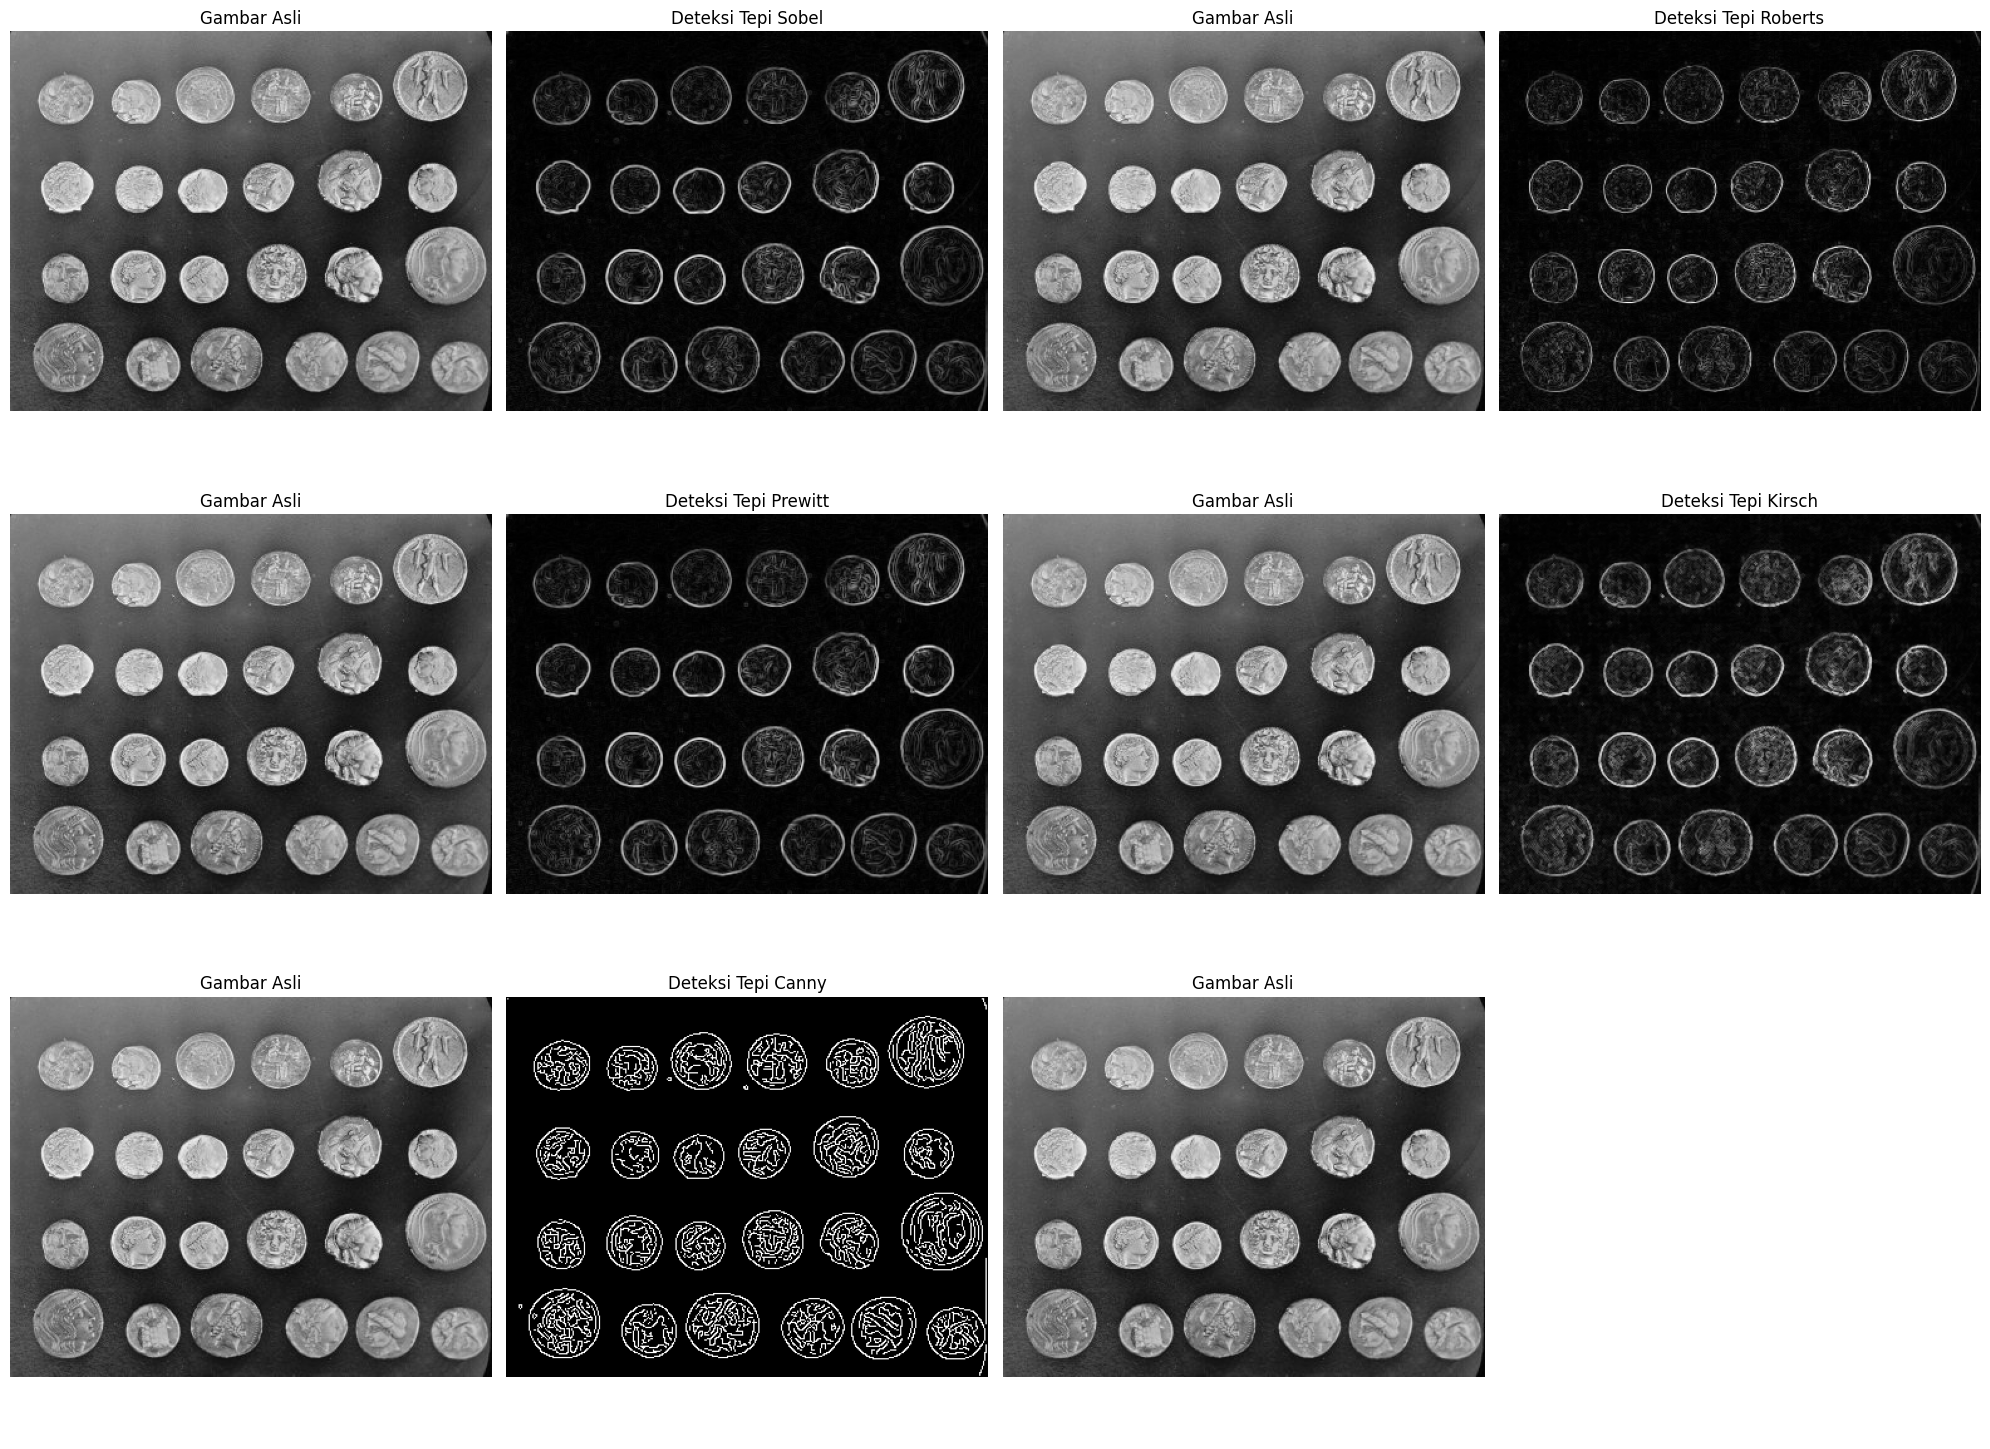

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1 AMBIL GAMBAR GRAYSCALE =====================
# Menggunakan gambar koin dari skimage
image_gray = data.coins()  # Gambar grayscale

# ===================== 2 TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================

# Operator Sobel
sobel_edge = filters.sobel(image_gray)

# Operator Roberts
roberts_edge = filters.roberts(image_gray)

# Operator Prewitt
prewitt_edge = filters.prewitt(image_gray)

# Operator Kirsch (Menggunakan filter gradien berbasis morfologi)
kirsch_edge = gradient(image_gray, disk(1))

# Operator Canny
canny_edge = feature.canny(image_gray, sigma=1)

# ===================== 3 VISUALISASI HASIL (FORMAT 4 KOLOM, 3 BARIS) =====================

fig, axes = plt.subplots(3, 4, figsize=(20, 15))
ax = axes.ravel()

# Baris 1: Gambar Asli - Sobel
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_edge, cmap='gray')
ax[1].set_title("Deteksi Tepi Sobel")
ax[1].axis("off")

ax[2].imshow(image_gray, cmap='gray')
ax[2].set_title("Gambar Asli")
ax[2].axis("off")

ax[3].imshow(roberts_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Roberts")
ax[3].axis("off")

# Baris 2: Gambar Asli - Prewitt
ax[4].imshow(image_gray, cmap='gray')
ax[4].set_title("Gambar Asli")
ax[4].axis("off")

ax[5].imshow(prewitt_edge, cmap='gray')
ax[5].set_title("Deteksi Tepi Prewitt")
ax[5].axis("off")

ax[6].imshow(image_gray, cmap='gray')
ax[6].set_title("Gambar Asli")
ax[6].axis("off")

ax[7].imshow(kirsch_edge, cmap='gray')
ax[7].set_title("Deteksi Tepi Kirsch")
ax[7].axis("off")

# Baris 3: Gambar Asli - Canny
ax[8].imshow(image_gray, cmap='gray')
ax[8].set_title("Gambar Asli")
ax[8].axis("off")

ax[9].imshow(canny_edge, cmap='gray')
ax[9].set_title("Deteksi Tepi Canny")
ax[9].axis("off")

ax[10].imshow(image_gray, cmap='gray')
ax[10].set_title("Gambar Asli")
ax[10].axis("off")

# Kosongkan posisi terakhir agar tampilan rapi
ax[11].axis("off")

plt.tight_layout()
plt.show()

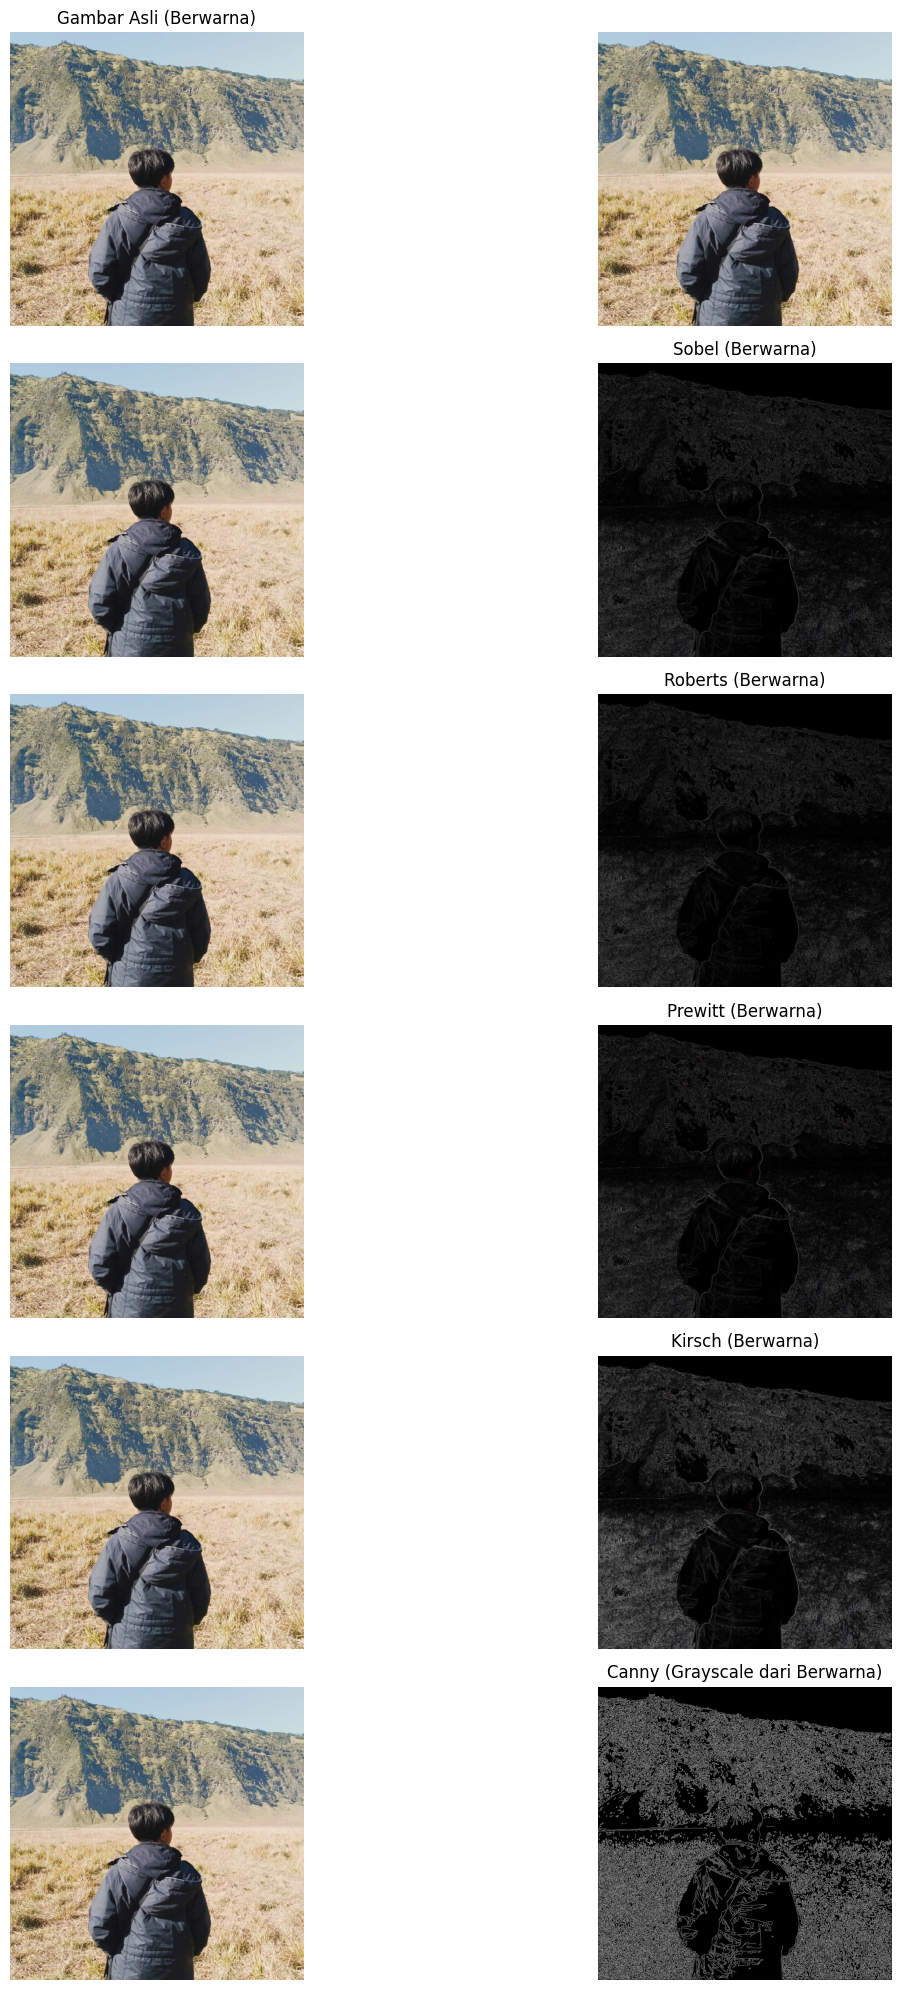

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, feature, color
from skimage.filters.rank import gradient
from skimage.morphology import disk

image_color = io.imread("Fatwa gunung bromo.jpg")

def apply_edge_detection(image, operator):

    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)

fig, axes = plt.subplots(6, 2, figsize=(15, 20))
ax = axes.ravel()

ax[0].imshow(image_color)
ax[0].set_title("Gambar Asli (Berwarna)")
ax[0].axis("off")

ax[1].imshow(image_color)
ax[1].axis("off")

ax[2].imshow(image_color)
ax[2].axis("off")

ax[3].imshow(sobel_color)
ax[3].set_title("Sobel (Berwarna)")
ax[3].axis("off")

ax[4].imshow(image_color)
ax[4].axis("off")

ax[5].imshow(roberts_color)
ax[5].set_title("Roberts (Berwarna)")
ax[5].axis("off")

ax[6].imshow(image_color)
ax[6].axis("off")

ax[7].imshow(prewitt_color)
ax[7].set_title("Prewitt (Berwarna)")
ax[7].axis("off")

ax[8].imshow(image_color)
ax[8].axis("off")

ax[9].imshow(kirsch_color)
ax[9].set_title("Kirsch (Berwarna)")
ax[9].axis("off")

ax[10].imshow(image_color)
ax[10].axis("off")

ax[11].imshow(canny_color, cmap='gray')
ax[11].set_title("Canny (Grayscale dari Berwarna)")
ax[11].axis("off")

plt.tight_layout()
plt.show()